In [35]:
import json
import os
import paths
from json_schema import TableSchema
import numpy as np


filenames = os.listdir(paths.JSON_FOLDER)

total_files = len(filenames)

num_table_dict = {}
num_footnotes_dict = {}
num_references_dict = {}
num_tab_ref_dict = {}

num_articles_extra_ref = 0

total_tables = 0
total_caption = 0
total_footnotes = 0
total_references = 0

papers_no_tables = ['2410.00031', '2410.00033', '2410.00240', '2410.00258', '2410.00318', '2410.00324', '2410.00332',
                    '2410.00340', '2410.00475', '2410.00503', '2410.00535', '2410.00654', '2410.00689', '2410.00690',
                    '2410.00774', '2410.01141', '2410.01242', '2410.01257', '2410.01386', '2410.01591', '2410.01661',
                    '2410.01686', '2410.01720', '2410.01791', '2410.01792', '2410.01808', '2410.01810', '2410.01812',
                    '2410.01818', '2410.01822', '2410.01978', '2410.02017', '2410.02089', '2410.02110', '2410.02172',
                    '2410.02378', '2410.02472', '2410.02536', '2410.02613', '2410.02724', '2410.02783', '2410.02795',
                    '2410.02800', '2410.02808', '2410.02816', '2410.02820', '2410.02826', '2410.02897', '2410.02932',
                    '2410.03018', '2410.03097', '2410.03185', '2410.03373', '2410.03523', '2410.03533', '2410.03662',
                    '2410.03688', '2410.03706', '2410.03738', '2410.03770', '2410.03786', '2410.03867', '2410.03893',
                    '2410.03960', '2410.04001', '2410.04060', '2410.04114', '2410.04148', '2410.04184', '2410.04360',
                    '2410.04421', '2410.04485', '2410.04612', '2410.04759', '2410.04855', '2410.05044', '2410.05056',
                    '2410.05094', '2410.05105']

for filename in filenames:

    num_tables = 0
    num_footnotes = 0
    num_references = 0

    with open(f"{paths.JSON_FOLDER}/{filename}", "r", encoding="utf-8") as file:
        data = json.load(file)

        for table_id in data:
            table = data[table_id]
 
            footnotes = table['footnotes']
            references = table['references']

            if table['table']:
                num_tables += 1

            if table['caption']:
                total_caption += 1

            if footnotes:
                num_footnotes += len(footnotes)
            
            if references:
                num_references += len(references)

    if num_tables < num_references:
        num_articles_extra_ref += 1

    if num_table_dict.get(num_tables) is None:
        num_table_dict[num_tables] = 0
    
    num_table_dict[num_tables] += 1

    if num_footnotes_dict.get(num_footnotes) is None:
        num_footnotes_dict[num_footnotes] = 0

    num_footnotes_dict[num_footnotes] += 1

    if num_references_dict.get(num_references) is None:
        num_references_dict[num_references] = 0

    num_references_dict[num_references] += 1

    if num_tables != 0:
        num_tab_ref_dict[filename] = num_references / num_tables
    elif filename.replace(".json", "") not in papers_no_tables:
        print(f"File {filename} has no tables")

    total_tables += num_tables
    total_footnotes += num_footnotes
    total_references += num_references

sorted_dict_by_keys = dict(sorted(num_table_dict.items()))
sorted_footnotes_by_keys = dict(sorted(num_footnotes_dict.items()))
sorted_references_by_keys = dict(sorted(num_references_dict.items()))

print(f"Total articles: {len(filenames)}")
print(f"Total captions: {total_caption}")
print(f"Total tables: {total_tables}")
print(f"Articles with more references than the number of tables: {num_articles_extra_ref}")

print(sorted_dict_by_keys)
print('\n')
print(sorted_footnotes_by_keys)

File 2410.01821.json has no tables
File 2410.03747.json has no tables
File 2410.04245.json has no tables
Total articles: 700
Total captions: 3777
Total tables: 3798
Articles with more references than the number of tables: 293
{0: 71, 1: 73, 2: 80, 3: 84, 4: 65, 5: 64, 6: 54, 7: 44, 8: 31, 9: 32, 10: 19, 11: 19, 12: 10, 13: 10, 14: 6, 15: 4, 16: 7, 17: 4, 18: 3, 19: 3, 20: 3, 21: 2, 22: 3, 23: 2, 24: 1, 28: 1, 35: 1, 42: 2, 44: 1, 52: 1}


{0: 323, 1: 14, 2: 24, 3: 19, 4: 20, 5: 9, 6: 20, 7: 9, 8: 20, 9: 7, 10: 10, 11: 4, 12: 23, 13: 2, 14: 12, 15: 13, 16: 8, 18: 16, 20: 6, 21: 8, 22: 2, 24: 13, 25: 2, 26: 3, 27: 3, 28: 3, 30: 10, 32: 4, 33: 3, 35: 6, 36: 3, 39: 1, 40: 5, 42: 8, 45: 4, 48: 5, 49: 1, 50: 1, 54: 4, 55: 2, 56: 3, 57: 1, 60: 3, 63: 1, 64: 1, 65: 3, 66: 2, 68: 1, 70: 2, 72: 2, 75: 1, 76: 1, 80: 2, 84: 4, 85: 1, 88: 1, 96: 1, 98: 1, 105: 1, 108: 1, 117: 1, 125: 1, 128: 1, 132: 2, 138: 1, 154: 1, 184: 1, 187: 1, 240: 1, 255: 1, 336: 1, 345: 1, 418: 1, 525: 1, 528: 1, 2600: 1}


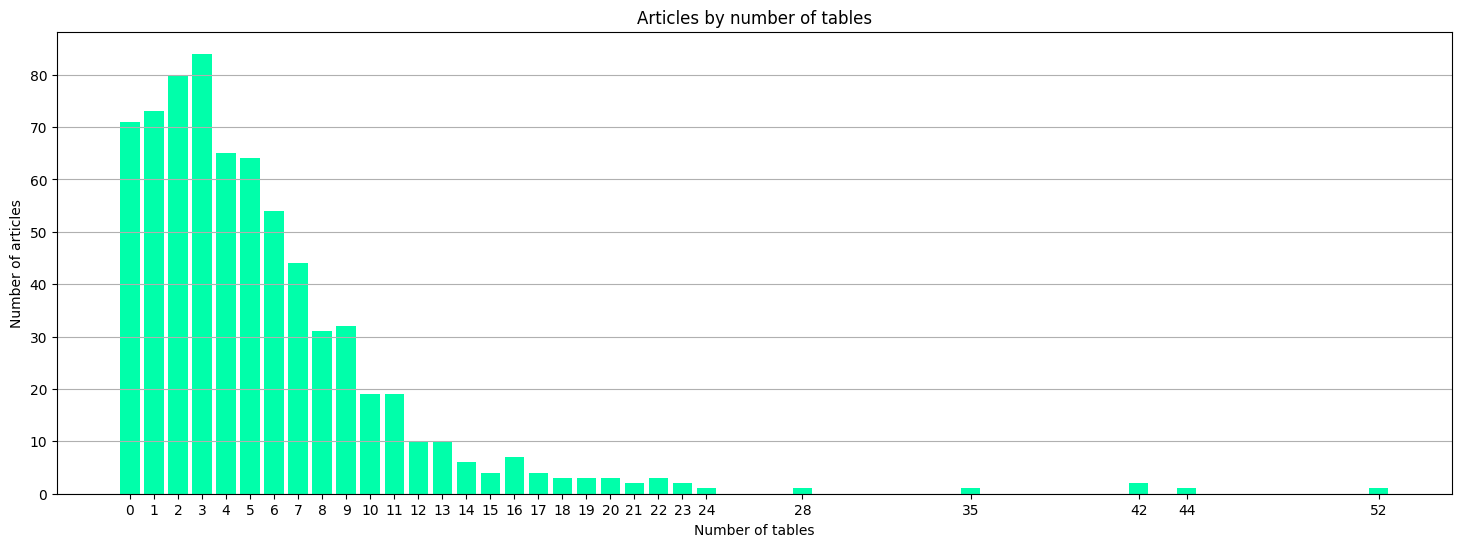

In [36]:
import matplotlib.pyplot as plt

keys = list(sorted_dict_by_keys.keys())
values = list(sorted_dict_by_keys.values())

plt.figure(figsize=(18, 6))
plt.bar(keys, values, color='#0fa')

plt.xlabel('Number of tables')
plt.ylabel('Number of articles')
plt.title('Articles by number of tables')
plt.xticks(keys) 

plt.grid(axis='y')
plt.show()

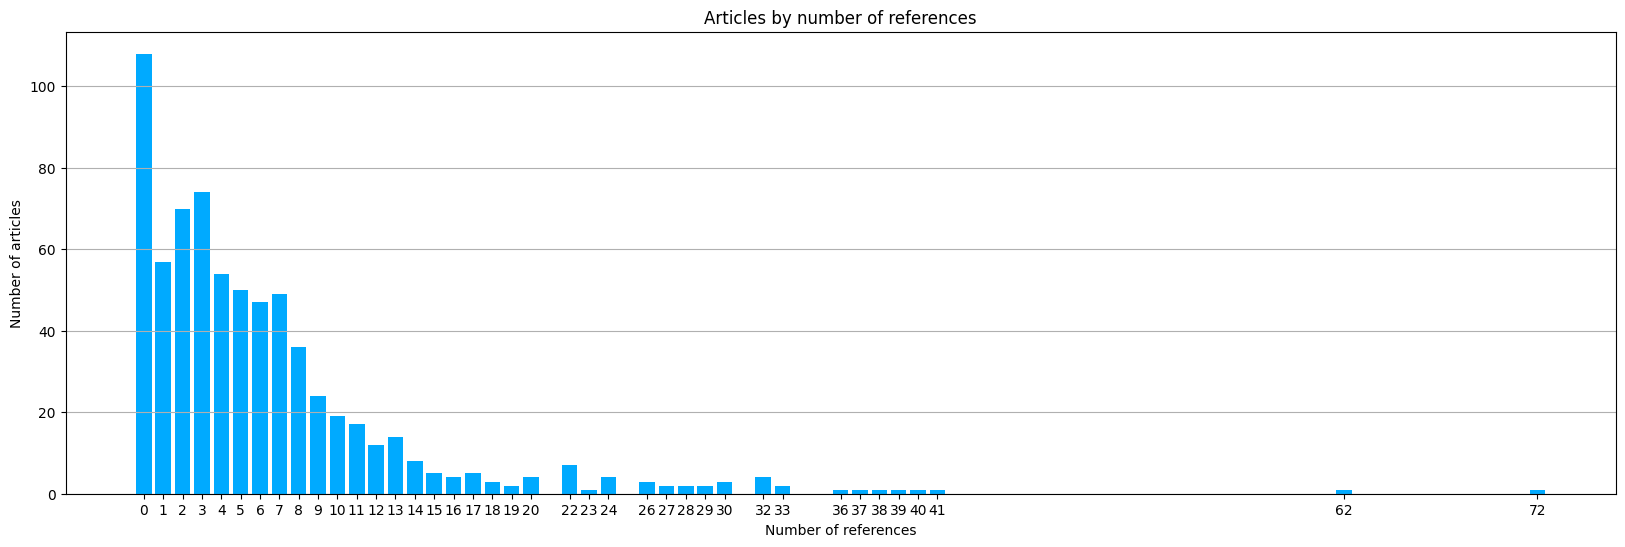

In [37]:
keys = list(sorted_references_by_keys.keys())
values = list(sorted_references_by_keys.values())

plt.figure(figsize=(20, 6))
plt.bar(keys, values, color='#0af')

plt.xlabel('Number of references')
plt.ylabel('Number of articles')
plt.title('Articles by number of references')
plt.xticks(keys) 

plt.grid(axis='y')
plt.show()

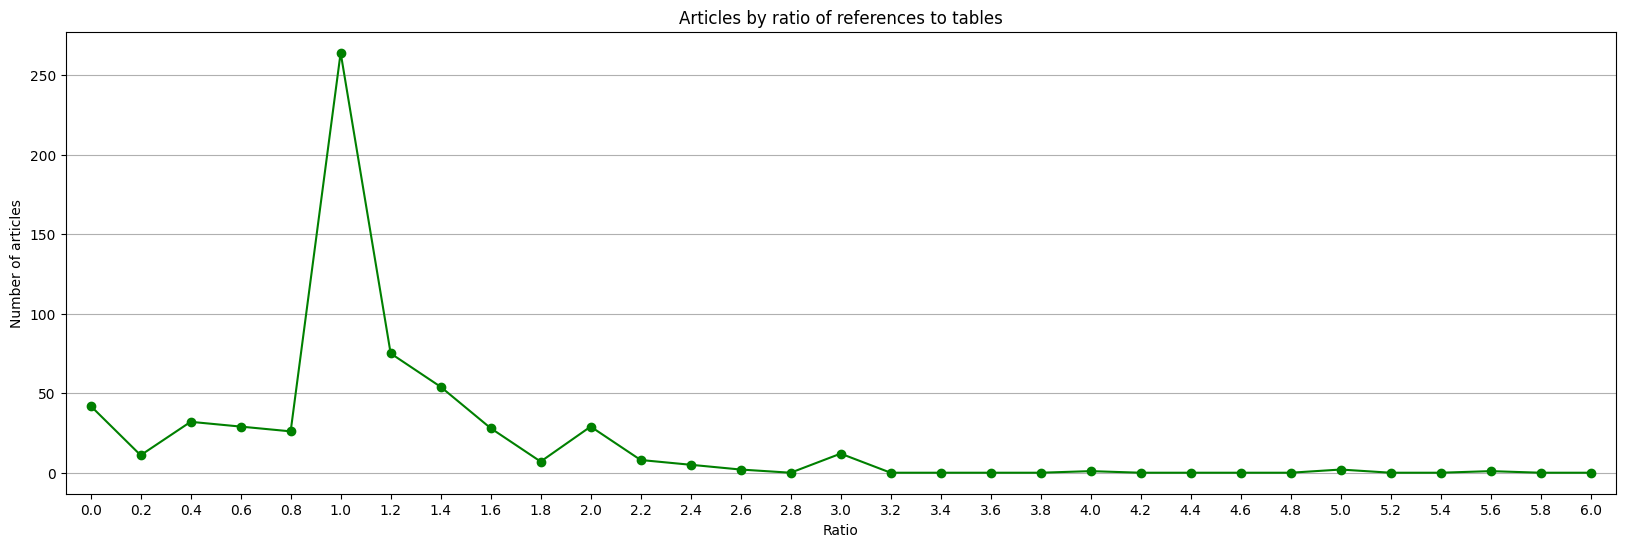

Number of papers with tables with zero references: 140


In [38]:

sorted_by_values = sorted(num_tab_ref_dict.values())

max_value = sorted_by_values[-1]

def count_floats_in_intervals(intervals):
    # Initialize a dictionary to hold the counts
    counts = {interval: 0 for interval in intervals}

    # Iterate through each float in the array
    for num in sorted_by_values:
        # Check each interval
        
        for i in range(len(intervals) - 1):
            if intervals[i] <= num < intervals[i + 1]:
                if counts.get(intervals[i]) is None:
                    counts[intervals[i]] = 0
                counts[intervals[i]] += 1

    return counts

step = 0.2
intervals = [i * step for i in range(int(max_value/step) + 1)]

counts_dict = count_floats_in_intervals(intervals)

interval_labels = list(counts_dict.keys())
counts = list(counts_dict.values())

indices = list(range(len(list(sorted_by_values))))

plt.figure(figsize=(20, 6))
plt.plot(interval_labels, counts, color='green', marker='o', linestyle='solid')

# Adding labels and title
plt.xlabel('Ratio')
plt.ylabel('Number of articles')
plt.title('Articles by ratio of references to tables')
plt.xticks(interval_labels)
plt.xlim(-0.1, max_value + 0.1)


# Show the plot with grid
plt.grid(axis='y')
plt.show()

num_paper_with_tables_with_zero_references = 0
for key, value in counts_dict.items():
    if key < 1:
        num_paper_with_tables_with_zero_references += value

print(f"Number of papers with tables with zero references: {num_paper_with_tables_with_zero_references}")